In [ ]:
!pip install langchain langgraph cassio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 35.1 MB/s eta 0:00:00


In [ ]:
import cassio
## connection of the astra db
ASTRA_DB_APPLICATION_TOKEN = "AstraCS:zlteLFylgbmNOYMDfjUjhEvB:727e4fa5c344968fc1c844819e473ec0fc50bf75b49413359f1ebac504315cc2"
ASTRA_DB_ID = "cdddb436-b9a6-4851-bedd-e1a4c86c08e0"
cassio.init(token = ASTRA_DB_APPLICATION_TOKEN,database_id = ASTRA_DB_ID)


In [ ]:
!pip install -U langchain_community langchainhub tiktoken langchain_groq chromadb langchain_huggingface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.7/409.7 kB 29.4 MB/s eta 0:00:00

In [ ]:
### Build Index

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader

# Docs to index
urls = ["https://lilianweng.github.io/posts/2023-06-23-agent/",
        "https://lilianweng.github.io/posts/2023-03-15-prompt-engineer",
        "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",

]
## load

docs = [WebBaseLoader(url).load()[0] for url in urls]
doc_list = [item for sublist in docs for item in sublist]
print(doc_list)
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size = 500, chunk_overlap = 0)
docs_split = text_splitter.split_documents(docs)

[('id', None), ('metadata', {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of f

In [ ]:
docs_split[0]

Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resul

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma

embeddings = HuggingFaceEmbeddings(model_name = "all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from langchain.vectorstores.cassandra import Cassandra
astra_vector_store = Cassandra(embedding=embeddings,table_name = "qa_mini_demo",session = None,keyspace= None)


In [ ]:
from langchain.indexes.vectorstore import VectorStoreIndexWrapper

astra_vector_store.add_documents(docs_split)
print("Inserted %i headlines" % len(docs_split))
astra_vector_index = VectorStoreIndexWrapper(vectorstore = astra_vector_store)

Inserted 69 headlines


In [ ]:
retriever = astra_vector_store.as_retriever()
retriever.invoke("agent")

[Document(id='38abb6891c004801a282de607909ad4e', metadata={'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context lear

In [ ]:
# # LangGraph Application

from typing import Literal
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field


class RouteQuery(BaseModel):
  """Route a query to the most relevant datasource"""

  datasource: Literal["vectorstore","wiki_search"] = Field(
      ...,
      description = "Given a user question to route it to wikipedia or a vectorstore,",
  )

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
from langchain_groq import ChatGroq
from google.colab import userdata
import os
groq_api_key = userdata.get("GROQ_API_KEY")
print(groq_api_key)

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


In [ ]:
llm = ChatGroq(groq_api_key=groq_api_key,model_name = "Llama-3.1-70b-Versatile")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7ac617472650>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7ac617472590>, model_name='Llama-3.1-70b-Versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
structured_llm_router = llm.with_structured_output(RouteQuery)

In [ ]:
# prompt
system = """You are an expert at routing a user question to a vectorstore or wikipedia .
The vectorstore contains documents related to agents, prompt enginnering, and adversial attacks.
Use the vectorstore for questions on these topics.Otherwise, use wiki-search."""
route_prompt = ChatPromptTemplate.from_messages(
    [
        ("system",system),
        ("human","{question}"),
    ]
)
question_router = route_prompt | structured_llm_router

In [ ]:
print(question_router.invoke(
    {
        "question":"What is agent"
    }
))

datasource='vectorstore'


In [ ]:
print(question_router.invoke(
    {
        "question":"where SRK lives"
    }
))

datasource='wiki_search'


In [ ]:
!pip install arxiv wikipedia

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.5 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=b8739ec75aa468dc8574c7de051d5d2f74b2563e70e27ed70712a23a817e946c
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=3ce10fe712fdcf98c27ec33749a5908aba3f3dfe0ec8c4c4e517e769918125c2
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built wikipedia sgmllib3k


In [ ]:
from langchain_community.utilities import  WikipediaAPIWrapper
from langchain_community.tools import  WikipediaQueryRun

api_wrapper = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=300)
wiki = WikipediaQueryRun(api_wrapper = api_wrapper)

In [ ]:
wiki.run("Tell me about Pushpa 2 Release")

'Page: Pushpa: The Rise\nSummary: Pushpa: The Rise is a 2021 Indian Telugu-language action drama film written and directed by Sukumar, and produced by Mythri Movie Makers and Muttamsetty Media. The film stars Allu Arjun as Pushpa Raj, a coolie who rises in a syndicate that smuggles red sandalwood, a r'

In [ ]:
# # AIagents Application using LangGraph

from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode,tools_condition
from typing import Annotated, List
from typing_extensions import TypedDict

class GraphState(TypedDict):
  """
  Represents the state of the graph.

  Attributes:
    question:question
    generation: LLM generation
    documents : list of documents
  """
  question:str
  generation:str
  documents:List[str]
  # messages:Annotated[list, add_messages]

In [ ]:
from langchain.schema import Document

def retrieve(state):
  """
  Retrieve documents

  Args:
    state(dict): The current graph state

  Returns:
    state(dict):New key added to state, documents, that contains retrieved documents
  """
  print("----Retreive-----")
  question = state["question"]
  # # Retreival
  documents = retriever.invoke(question)
  return {"documents":documents, "question":question}

In [ ]:
def wiki_search(state):
  """
  Retrieve Wikipedia documents

  Args:
    state(dict): The current graph state

  Returns:
    state(dict):New key added to state, documents, that contains retrieved documents
  """
  print("----WikiSearch-----")
  question = state["question"]
  print(question)
  # # Wiki Search
  docs = wiki.invoke({"query":question})
  wiki_results = docs
  wiki_results = Document(page_content = wiki_results)
  return {"documents":wiki_results, "question":question}

In [ ]:
def route_question(state):
  """
  Route a query to wikisearch or  vectordatasource

  Args:
    state(dict): The current graph state

  Returns:
    str:Next node to call
  """
  print("----Route Question-----")
  question = state["question"]
  # print(question)
  source = question_router.invoke({"question":question})
  if source.datasource == "vectorstore":
    print("---ROUTE QUESTION TO RAG----")
    return "vectorstore"
  elif source.datasource == "wiki_search":
    print("---ROUTE QUESTION TO WiKi SEARCH----")
    return "wiki_search"


In [ ]:
workflow = StateGraph(GraphState)

## Define the nodes
workflow.add_node("wiki_search",wiki_search) #websearch
workflow.add_node("retrieve",retrieve) #retreive

# # Build the graph
workflow.add_conditional_edges(
    START,
    route_question,{
        "vectorstore":"retrieve",
        "wiki_search":"wiki_search",
    },
    )
workflow.add_edge("retrieve",END)
workflow.add_edge("wiki_search",END)

# # compile
app = workflow.compile()

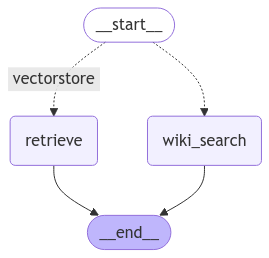

In [ ]:
from IPython.display import Image, display
try:
  display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
  print(e)
  pass

In [ ]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in app.stream({"question":user_input}):
    # print(event.values())
    for value in event.values():
      # print(value['messages'])
      print(" Value",value)
      # Check if the document is a Document object before accessing metadata
      if isinstance(value["documents"],Document):
        print("Assistant:", value["documents"].page_content)
      elif isinstance(value["documents"], list) and value["documents"] and isinstance(value["documents"][0], Document):  # Check if it's a list of Documents
        print("Assistant:", value["documents"][0].page_content)
      else:
        # If it's a string, print it directly
        print("Assistant:", value["documents"])

      # print("Assistant:", value["documents"][0].dict()['metadata']['description'])

----Route Question-----
---ROUTE QUESTION TO WiKi SEARCH----
----WikiSearch-----
Hello
 Value {'question': 'Hello', 'documents': Document(metadata={}, page_content='Page: Hello\nSummary: Hello is a salutation or greeting in the English language. It is first attested in writing from 1826.\n\n')}
Assistant: Page: Hello
Summary: Hello is a salutation or greeting in the English language. It is first attested in writing from 1826.


----Route Question-----
---ROUTE QUESTION TO WiKi SEARCH----
----WikiSearch-----
hello my name is Pinkal
 Value {'question': 'hello my name is Pinkal', 'documents': Document(metadata={}, page_content='Page: Hello Kitty\nSummary: Hello Kitty (Japanese: ハロー・キティ, Hepburn: Harō Kiti), also known by her real name Kitty White (キティ・ホワイト, Kiti Howaito), is a fictional character created by Yuko Shimizu, currently designed by Yuko Yamaguchi, and owned by the Japanese company Sanrio. Sanrio depicts Hello Kit')}
Assistant: Page: Hello Kitty
Summary: Hello Kitty (Japanese: ハ

---ROUTE QUESTION TO RAG----
----Retreive-----
 Value {'question': 'what is agents', 'documents': [Document(id='d1d654cc56134282a9bab5d1caed8433', metadata={'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the qu

---ROUTE QUESTION TO RAG----
----Retreive-----
 Value {'question': 'what are diffrent prompting types', 'documents': [Document(id='d1d654cc56134282a9bab5d1caed8433', metadata={'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, there